비지도학습인 군집화에서 지표로 성능을 평가하기는 어려움
그러나 군집화는 실루엣 분석을 이용

## Silhouette analysis
군집 간의 자리가 얼마나 효울적으로 분리되어 있는지 분석
실루엣 계수
- a\[i]: 동일 군집 내 다른 데이터 포인트와의 거리 평균
- b\[i]: 포인트가 속하지 않은 군집 중 가장 가까운 군집과의 거리 평균
- s(i) = (b(i) - a(i)) / (max(a(i), b(i))

Scikit Learn 에서는 군집화 메서드 제공

전체 실루엣 계수의 평균값은 1에 가까워야 함
개별 군집 평균값의 편차가 크지 않아야 함

## 붓꽃 데이터 세트

In [2]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
feature_names = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
irisDF = pd.DataFrame(data=iris.data, columns=feature_names)
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0).fit(irisDF)
irisDF["cluster"] = kmeans.labels_

# silhouette coefficient
score_samples = silhouette_samples(iris.data, irisDF["cluster"])
print("silhouette_samples() return value shape", score_samples.shape)

irisDF["silhouette_coeff"] = score_samples

average_score = silhouette_score(iris.data, irisDF["cluster"])
print("Silhouette Analysis Score:{0:.3f}".format(average_score))
irisDF

silhouette_samples() return value shape (150,)
Silhouette Analysis Score:0.553


,sepal_length,sepal_width,petal_length,petal_width,cluster,silhouette_coeff
0,5.1,3.5,1.4,0.2,1,0.852955
1,4.9,3.0,1.4,0.2,1,0.815495
2,4.7,3.2,1.3,0.2,1,0.829315
3,4.6,3.1,1.5,0.2,1,0.805014
4,5.0,3.6,1.4,0.2,1,0.849302
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,0.425136
146,6.3,2.5,5.0,1.9,0,0.104171
147,6.5,3.0,5.2,2.0,2,0.314930
148,6.2,3.4,5.4,2.3,2,0.352454


In [3]:
irisDF.groupby("cluster")["silhouette_coeff"].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

## 군집 개수 최적화 방법

In [4]:
# visualize_silhouette function (got from study book's repository)
def visualize_silhouette(cluster_lists, X_features):

    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math

    n_cols = len(cluster_lists)

    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):

        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)

        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                                                                  'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                   facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

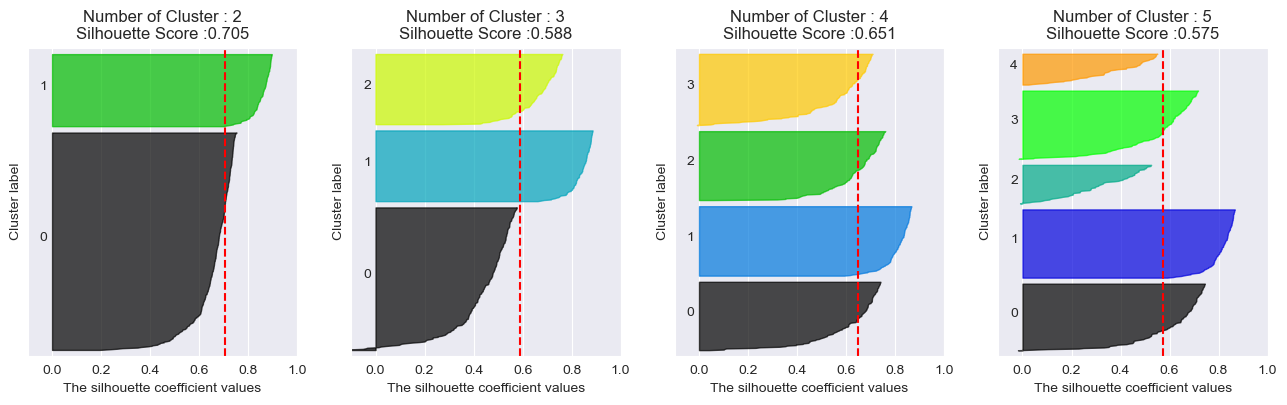

In [7]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1.0,
                  center_box=(-10.0, 10.0), shuffle=True, random_state=1)

visualize_silhouette([2, 3, 4, 5], X)

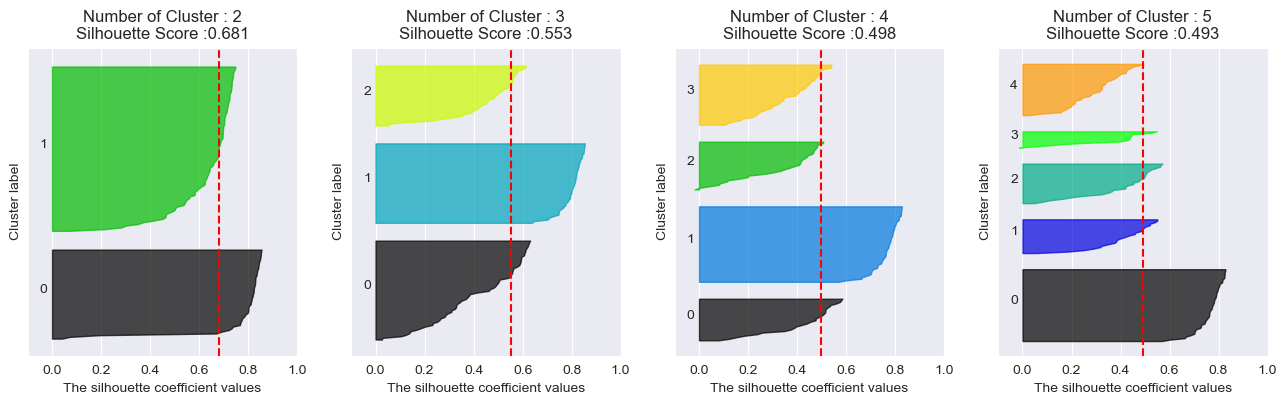

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
visualize_silhouette([2, 3, 4, 5], iris.data)